In [63]:
import skimage
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
import skimage.morphology
from skimage.color import rgb2lab
import os

In [88]:
# Folder with the original annotations
annot_1_path = '/home/malou/Projects/0_MasterProject/2_data/0_Aits_images/raw_annotations/'

# Folder with the new annotations
annot_2_path = '/home/malou/Projects/0_MasterProject/2_data/1_cvat_annotations/SegmentationObject/'

# Folder to store the new created annotations
new_annot_path = '/home/malou/Projects/0_MasterProject/2_data/0_Aits_images/v2_annotations/'

os.makedirs(new_annot_path, exist_ok = True)

filelist = os.listdir(annot_1_path)


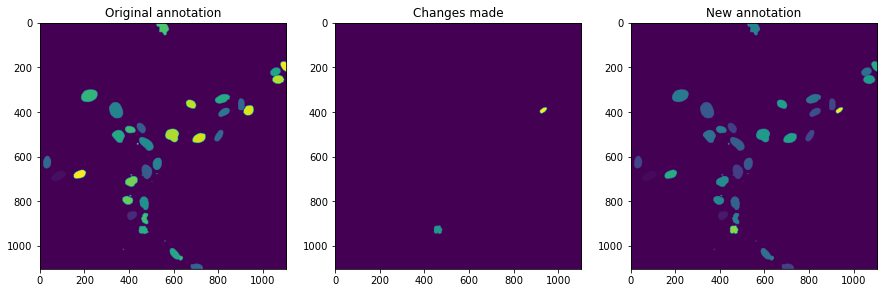

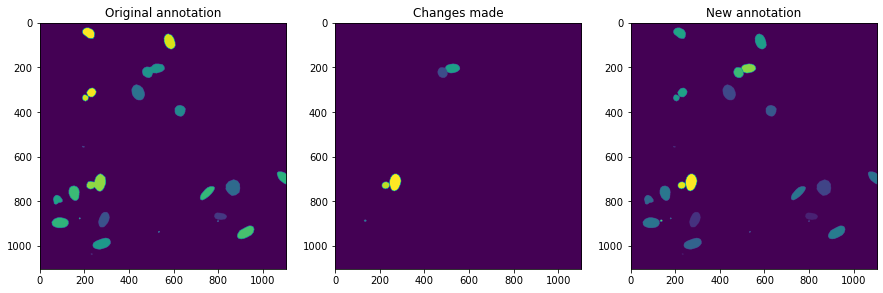

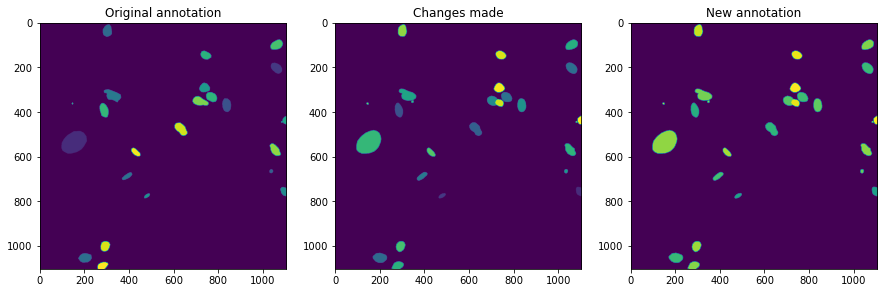

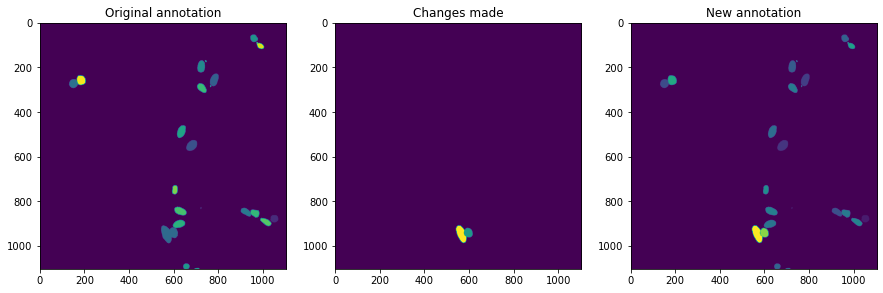

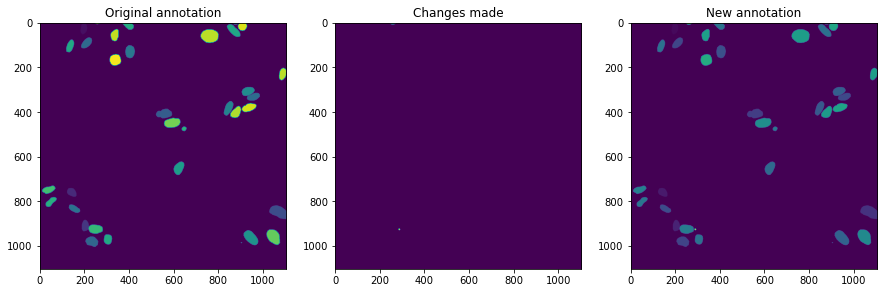

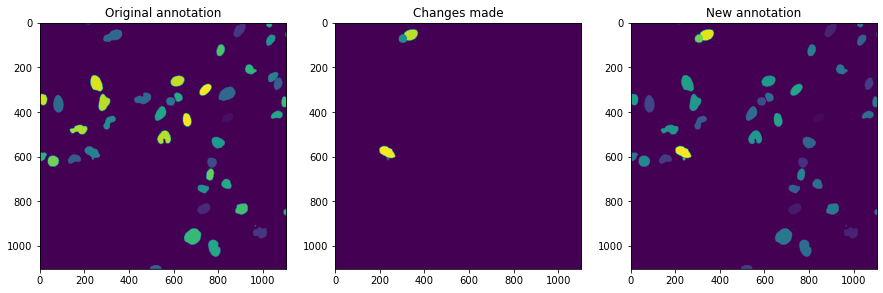

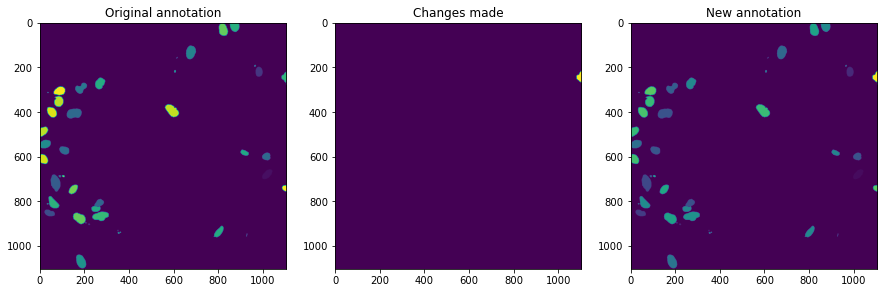

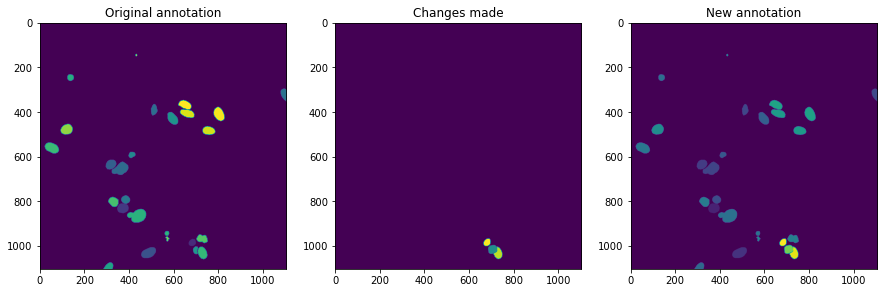

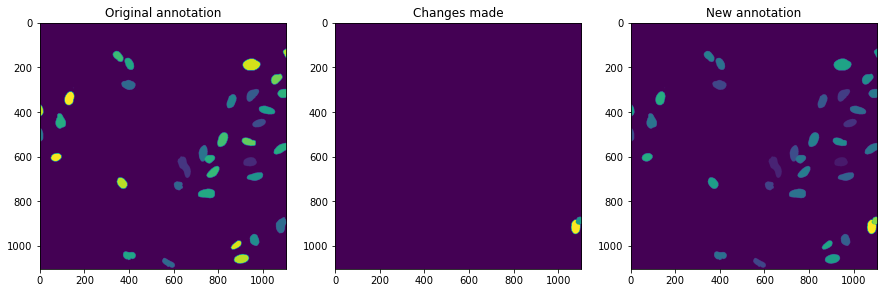

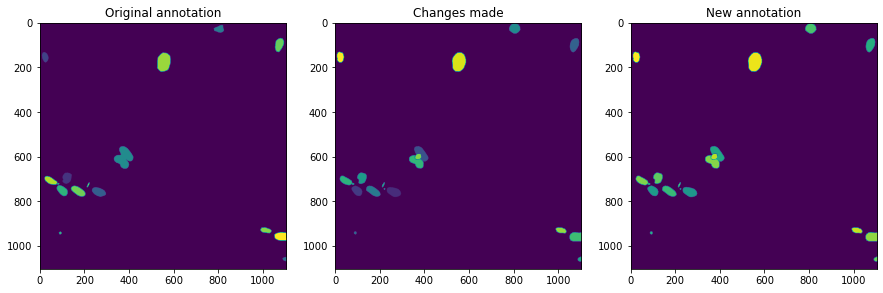

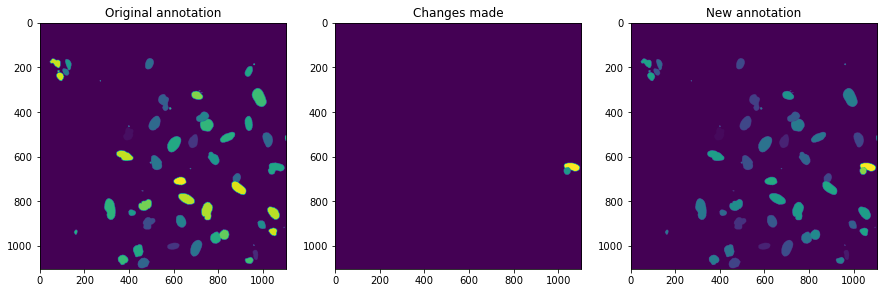

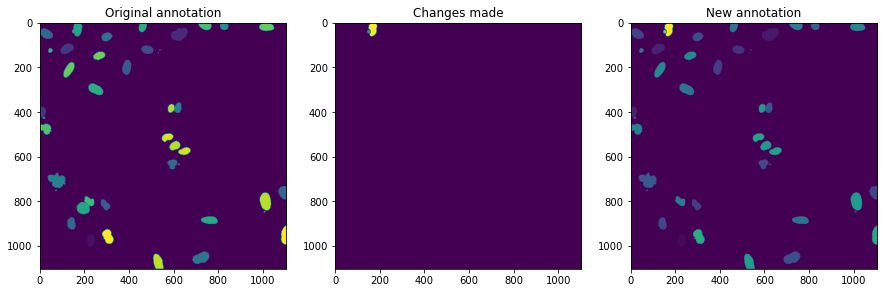

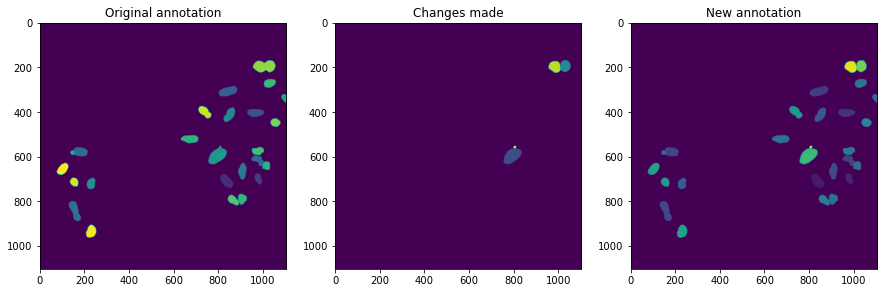

In [123]:
"""
This script loads an image with new annotations, and the corresponding previous annotation,
and replaces the old annotation with the new objects while keeping the other annotations.

The pixelvalues of each object in the image is stored, and all positions where that value is found.
those positions are then replaces in the previous image. 

This script will not account for the objects we want to remove, since the new annotations only include the changed annotations.
"""
for image in filelist:
    im_annot_1 = skimage.io.imread(annot_1_path + image) # Loading images - Original annotation
    im_annot_2 = skimage.io.imread(annot_2_path + image) # image with changes in annotation
    
    im_annot_1 = rgb2lab(im_annot_1)[:,:,0].astype(np.uint8) # convert images so each object is 1 pixelvalue
    im_annot_2 = rgb2lab(im_annot_2)[:,:,0].astype(np.uint8)
    fig = plt.figure(figsize = (15,8))
    a=fig.add_subplot(1,3,1)
    plt.imshow(im_annot_1)
    plt.title('Original annotation')
    unique_objects = np.unique(im_annot_2)[1:]               # find all unique object values
    unique_objects_1 = np.unique(im_annot_1)[1:]
    max_uniq = max(unique_objects_1)
    unique_objects = [i + max_uniq for i in unique_objects]  # Change values to avoid same pixelvalue of objects in both images
    for nuclei in unique_objects:                            # Iterate through "object-value-list"
        x_position,y_position = np.where(im_annot_2 == nuclei - max_uniq) # finds the position of the object
        for i in range(len(x_position)):          
            if im_annot_1[x_position[i],y_position[i]]==0:   # If the old image has background, then change to new objectvalue             
                im_annot_1[x_position[i],y_position[i]] = nuclei
            else:                                            # If not background, previous object should be removed to make room for the new object.
                old_color = im_annot_1[x_position[i],y_position[i]] # Finds the old pixelvalue 
                im_annot_1[im_annot_1 == old_color] = 0             # Locate all positions with that value and changes to background, i.e. object is removed from image
                im_annot_1[x_position[i],y_position[i]] = nuclei    # Current position now gets the new pixelvalue.
    
    skimage.io.imsave(new_annot_path + image, im_annot_1)
    b = fig.add_subplot(1,3,2)
    plt.imshow(im_annot_2)
    plt.title('Changes made')
    c = fig.add_subplot(1,3,3)
    plt.imshow(im_annot_1)
    plt.title('New annotation')
    plt.show()